# Exploration of higher order gamma model
* Additional Taylor coefficents can better match observed shape of gamma model for MD data
* But the coefficients are not well constrained and yield unphysical behavior at very high pressures beyond the data range
  * gamma tends toward negative infinity at high compression

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
from scipy import optimize


import xmeos
from xmeos import models
from xmeos import datamod

In [10]:
analysis_file = 'data/analysis.pkl'
with open(analysis_file, 'rb') as f:
    analysis = pickle.load(f)
    
gamma_avg_md = analysis['gamma_avg_md']

[  1.66856894e+00   2.64790806e+01   2.58061081e+02  -2.05182754e+03]


<IPython.core.display.Javascript object>


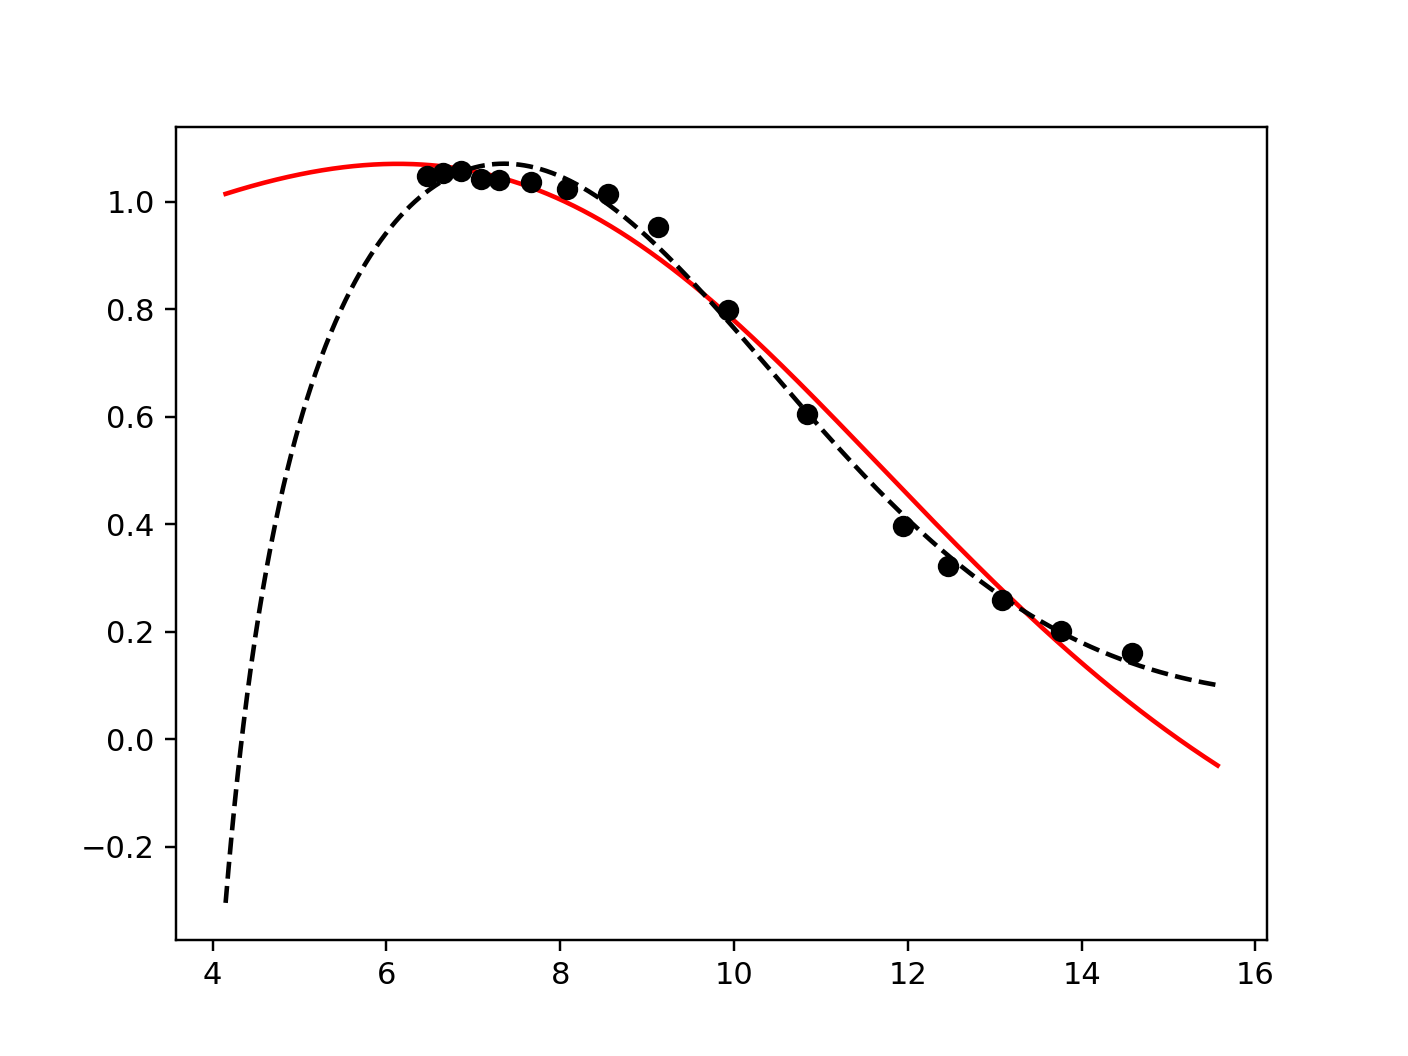

In [13]:
V0 = 12.97
a1=6*.134
a2=-12*.1+36*.1**2-18*(-2.113)
a3=0
a4=0
a5=0
# params0 = [a1,a2,a3]
#params0 = [a1,a2]




def calc_gamma(V, params, V0=V0):
    a = np.zeros(4)
    a[0:len(params)] = params
    
    fstr = .5*((V0/V)**(2/3)-1)
    gamma = 1/6*(2*fstr+1)*(
        a[0]+a[1]*fstr+1/2*a[2]*fstr**2+1/6*a[3]*fstr**3)/(
        1+a[0]*fstr+.5*a[1]*fstr**2+1/6*a[2]*fstr**3+1/24*a[3]*fstr**4)
    return gamma

def calc_adiabatic_temp(V, params, V0=V0, T0=1):
    a = np.zeros(4)
    a[0:len(params)] = params
    fstr = .5*((V0/V)**(2/3)-1)
    Tad = T0*np.sqrt(
        1+a[0]*fstr+.5*a[1]*fstr**2+1/6*a[2]*fstr**3+1/24*a[3]*fstr**4)
    return Tad
                     


def resid(params, gamma_dat=gamma_avg_md['gamma'], 
          V=gamma_avg_md['V'], V0=V0):
    gamma_mod = calc_gamma(V, params, V0=V0)
    resid = gamma_mod-gamma_dat
    return resid
params0_simp = [a1,a2]
params0 = [a1,a2,a3,a4]


# params0 = [a1,a2,a3]
fit_tup = optimize.leastsq(resid, params0)
paramsf = fit_tup[0]
# paramsf[2]=0

fit_tup_simp = optimize.leastsq(resid, params0_simp)
paramsf_simp = fit_tup_simp[0]

Vmod = V0*np.linspace(.32,1.2,1001)
gamma_f = calc_gamma(Vmod, paramsf)
gamma_f_simp = calc_gamma(Vmod, paramsf_simp)
gamma_init = calc_gamma(Vmod,params0)
print(paramsf)
    
# logTad = np.log(calc_adiabatic_temp(Vmod, paramsf))
# gamma_grad = -np.diff(logTad)/np.diff(np.log(Vmod))

plt.figure()
plt.plot(Vmod,gamma_f_simp,'r-',
         gamma_avg_md['V'], gamma_avg_md['gamma'],'ko', 
         Vmod, gamma_f, 'k--')

